# 量子テレポーテーション（2023年 Lab2）

アリスとボブが抱えている問題を解決する量子テレポーテーションのLabへようこそ。ご安心ください、人間関係の問題ではありませんよ！アリスは未知の状態 $\lvert \psi \rangle$ の量子ビットを所持しており、この量子状態をボブに転送したいと考えています。しかしながら彼らは非常に離れた場所におり、量子情報を直接転送する手段はなく、転送できるのは古典情報のみです。彼らの目標を達成することは可能でしょうか？

アリスとボブがエンタングルした量子ビットのペアを共有している場合、彼女が２ビットの古典情報を送信することで、量子ビットの状態をボブに転送できることがわかっています。最終的に、ボブが $\lvert \psi \rangle$ を所有し、アリスはそれを持たなくなるため、このプロセスはテレポーテーションとして知られています。

## 背景

量子テレポーテーションは、エンタングルメントと古典通信を使用し、ある量子ビットから別の量子ビットへと量子情報の転送を可能にするプロトコルです。このプロトコルは、1993年に Charles Bennett、Gilles Brassard、Claude Crépeau、Richard Jozsa、Asher Peres および William Wootters によって提案されました。このプロセスは、量子ビット自体を送信するのではなく、ソース量子ビットからターゲット量子ビットに量子状態を転送します。

プロトコルには３つの量子ビットが必要です。

1. テレポートする量子ビット（アリスの量子ビット）
2. エンタングルした量子ビットのペアの片方（アリスの２番目の量子ビット）
3. エンタングルしたペアのもう片方（ボブの量子ビット）

プロトコルは、次の手順に要約できます。

1. アリスとボブの間で共有される、エンタングルした量子ビットのペア（Bellペア）を生成します。
2. アリスは、自身が持つ２つの量子ビットに対しBell基底測定を実行します。
3. アリスは、古典測定の結果をボブに送信します。
4. ボブは、アリスの測定結果に基づいて適切な量子ゲートを適用し、テレポート状態を取得します。

## 実装

量子ビットを転送するためには、アリスとボブにエンタングルした量子ビットのペアを提供してくれる第三者の助けが必要です。次に、アリスは量子ビットに対して特定の操作を実行し、その結果を古典通信チャネルを介してボブと共有します。最後に、ボブは自分の側で一連の操作を実行し、アリスの量子ビットを正常に取得します。それでは、これらの各ステップについて詳しく見ていきましょう。

量子回路は、３つの量子ビットと３つの古典ビットで構成されます。量子ビットは次のように命名されます。

- $s$: アリスがボブに送信したい、状態 $\lvert \psi \rangle$ を含む「ソース」量子ビット。
- $a$: エンタングルしたBellペアのうち、アリスが持つ片方を最初に格納する量子ビット。
- $b$: エンタングルしたBellペアのうち、ボブが持つもう片方を最初に格納する量子ビット。


テレポーテーションプロトコル自体には２つの古典ビットが必要であり、ボブの最終状態を測定するために使用する３つ目の古典ビットも含まれます。古典ビットは次のように命名されます。

- $c0$: アリスが $a$ の測定に使用する古典ビット。
- $c1$: アリスが $s$ の測定に使用する古典ビット。
- $c2$: ボブが $b$ の測定に使用する古典ビット。

## Exercise 1

````{admonition} Bell状態の生成
２つの量子ビットを利用して、エンタングルしたBellペアの状態 $\frac{\lvert 00 \rangle + \lvert 11 \rangle}{\sqrt{2}}$ を生成してください。量子ビット $a$ はアリスに割り当てられ、量子ビット $b$ はボブのものです。

```{hint}
Bell状態はアダマールゲートとCNOTゲートを使うことで生成できます。
```

```python
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Qubit, Clbit

def create_bell_pair(qr: QuantumRegister, cr: ClassicalRegister) -> QuantumCircuit:
    """Creates a bell pair between qubits a and b."""
    qc = QuantumCircuit(qr, cr)
    # unpack qubits
    # the first qubit is s but we won't be using it in this exercise
    _, a, b = qr

    ####### your code goes here #######

    return qc
```
````

## Exercise 1 解答例

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Qubit, Clbit

def create_bell_pair(qr: QuantumRegister, cr: ClassicalRegister) -> QuantumCircuit:
    """Creates a bell pair between qubits a and b."""
    qc = QuantumCircuit(qr, cr)
    # unpack qubits
    # the first qubit is s but we won't be using it in this exercise
    _, a, b = qr

    qc.h(a)
    qc.cx(a, b)

    return qc

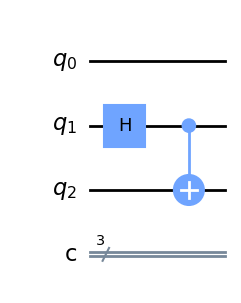

In [2]:
qr = QuantumRegister(3, name="q")
cr = ClassicalRegister(3, name="c")
qc = create_bell_pair(qr, cr)

qc.draw("mpl")

In [3]:
# # Submit your circuit
# from qc_grader.challenges.spring_2023 import grade_ex2a
# grade_ex2a(qc)

  ```{admonition} 解説
  :class: tip
  1行目：
  アリスがもつ量子ビットを重ね合わせ状態にするためにアダマールゲートを使います。
  アダマールゲートを量子ビットに適用するときは".h()"というメソッドを使い、引数に重ね合わせ状態にしたい量子ビットを入力します。
  2行目：
  CNOTゲートを使って、アリスのもつ量子ビットを制御量子ビットに、ボブのもつ量子ビットをターゲット量子ビットに設定します。
  CNOTゲートを量子ビットに適用するときは".cx()"というメソッドを使い、引数の1番目に制御量子ビット、2番目にターゲット量子ビットにしたい量子ビットを入力します
  ```

アリスが量子ビット $a$ を持ち、ボブが量子ビット $b$ を持っていると仮定しましょう。彼らは本当に関係性に問題を抱えているかもしれませんね😉。

## Exercise 2

````{admonition} Bell状態の生成
次のプロトコルを実装してください。
1. アリスが、 $s$ ($\lvert \psi \rangle$ を含む量子ビット)を制御、 $a$ をターゲットとしてCNOTゲートを適用する。
2. アリスが $s$ にアダマールゲートを適用する。

```python
def alice_gates(qr: QuantumRegister, cr: ClassicalRegister):
    """Creates Alices's gates"""
    qc = create_bell_pair(qr, cr)
    qc.barrier()  # Use barrier to separate steps
    s, a, b = qr

    ####### your code goes here #######
    
    return qc
```
````

## Exercise 2 解答例

In [4]:
def alice_gates(qr: QuantumRegister, cr: ClassicalRegister):
    """Creates Alices's gates"""
    qc = create_bell_pair(qr, cr)
    qc.barrier()  # Use barrier to separate steps
    s, a, b = qr

    qc.cx(s, a)
    qc.h(s)
    
    return qc

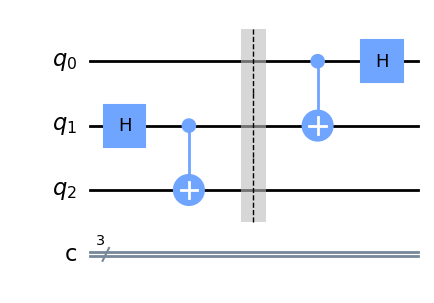

In [5]:
qc = alice_gates(qr, cr)
qc.draw("mpl")

In [6]:
# # Submit your circuit
# from qc_grader.challenges.spring_2023 import grade_ex2b
# grade_ex2b(qc)

## Exercise 3

````{admonition} Bell状態の生成
このステップでは、アリスは所有している両方の量子ビットで測定を実行し、結果を２つの古典ビットに保存します。その後、彼女はこれら２つのビットをボブに送信します。

彼女は量子ビット $a$ を古典ビット $c0$ に、量子ビット $s$ を古典ビット $c1$ に測定して入れるように以下のコードセルを完成させてください。

```python
def measure_and_send(qr: QuantumRegister, cr: ClassicalRegister):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc = alice_gates(qr, cr)
    qc.barrier()  # Use barrier to separate steps
    s, a, b = qr
    c0, c1, c2 = cr

    ####### your code goes here #######
    
    return qc
```
````

## Exercise 3 解答例

In [7]:
def measure_and_send(qr: QuantumRegister, cr: ClassicalRegister):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc = alice_gates(qr, cr)
    qc.barrier()  # Use barrier to separate steps
    s, a, b = qr
    c0, c1, c2 = cr

    qc.measure(a, c0)
    qc.measure(s, c1)
    
    return qc

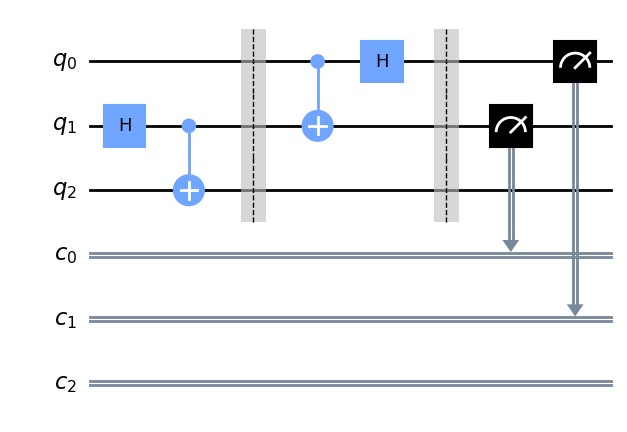

In [8]:
qc = measure_and_send(qr, cr)
qc.draw("mpl", cregbundle=False)

In [9]:
# # Submit your circuit
# from qc_grader.challenges.spring_2023 import grade_ex2c
# grade_ex2c(qc)

  ```{admonition} 解説
  :class: tip
  測定を実行するためには".measure"メソッドを使います。
  このメソッドでは1番目の引数に測定対象である量子ビットを、2番目に測定結果を格納したい古典ビットを入力します。
  ```

## Exercise 4

````{admonition} Bell状態の生成
このステップでは、すでに量子ビット $b$ を所有しているボブが、アリスから受け取った古典ビットの状態に基づいて、回路に特定のゲートを動的に追加します。

- ビットが `00` の場合、アクションは必要ありません。
- ビットが `01` の場合、 $X$ ゲート（Pauli-X または ビット・フリップ・ゲートとも呼ばれます）を適用する必要があります。
- ビット `10` には、 $Z$ ゲート（Pauli-Z または フェーズ・フリップ・ゲートとも呼ばれます）を適用する必要があります。
- 最後に、古典ビットが `11` の場合は、 $ZX$ ゲートを適用する必要があります。これには、 $Z$ゲートと $X$ ゲートの両方を順番に適用する必要があります。

```python
def bob_gates(qr: QuantumRegister, cr: ClassicalRegister):
    """Uses qc.if_test to control which gates are dynamically added"""
    qc = measure_and_send(qr, cr)
    qc.barrier()  # Use barrier to separate steps
    s, a, b = qr
    c0, c1, c2 = cr

    ####### your code goes here #######
    
    return qc
```
````

## Exercise 4 解答例

In [10]:
def bob_gates(qr: QuantumRegister, cr: ClassicalRegister):
    """Uses qc.if_test to control which gates are dynamically added"""
    qc = measure_and_send(qr, cr)
    qc.barrier()  # Use barrier to separate steps
    s, a, b = qr
    c0, c1, c2 = cr

    with qc.if_test((c0, 1)):
      qc.x(b)
    with qc.if_test((c1, 1)):
      qc.z(b)
    
    return qc

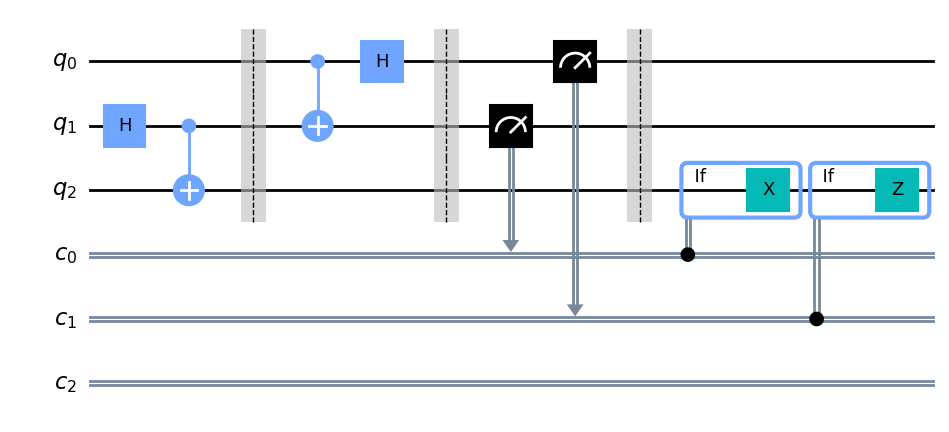

In [11]:
qc = bob_gates(qr, cr)
qc.draw("mpl", cregbundle=False)

In [12]:
# # Submit your circuit
# from qc_grader.challenges.spring_2023 import grade_ex2d
# grade_ex2d(qc)

  ```{admonition} 解説
  :class: tip
  古典ビットの状態は右から左の順で読みます。
  したがって、例えば最初のビットであるc0の状態が0で次のビットであるc1が1であるとき、ビットに状態は10と表現されます。
  問題文の条件をを言い換えると、「c0が状態1であるときはXゲートを適用し、c1が状態1であるときはZゲートを適用する必要がある」となります。
  ここでは".if_test"メソッドを使っています。最初の引数にビットを、2番目に条件となる状態を入力します。
  ```

ここで、ボブは自分の量子ビットを測定して、古典ビット $c2$ に入れます。実験全体を複数回繰り返した後、測定結果に関する統計を収集して、テレポーテーションが正しく機能したことを確認できます。

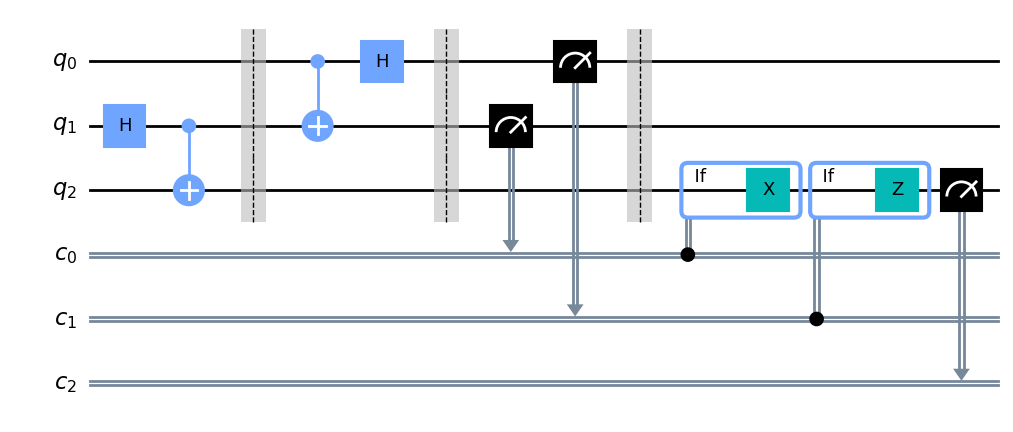

In [13]:
teleportation_circuit = bob_gates(qr, cr)
s, a, b = qr
c0, c1, c2 = cr
teleportation_circuit.measure(b, c2)
teleportation_circuit.draw("mpl")

テレポーテーション回路ができたので、~~カーク船長を見知らぬ惑星の地表に転送して~~ 量子状態の生成とテレポートを、シミュレーター上の回路で実行しましょう。

## Exercise 5

````{admonition} Bell状態の生成

次のコードセルでは、完全な量子テレポーテーション回路を `teleport_superposition_circuit` 変数に構築します。次のステップに従ってください。

- 状態を準備する回路を構築します。角度 $\pi / 4$ の $R_x$ 回転ゲートを適用して量子ビット $s$ を準備してください。
- 状態準備回路と先ほど構築したテレポーテーション回路を結合してください。

```python
import math

teleport_superposition_circuit: QuantumCircuit

####### your code goes here #######

# Uncomment this line to draw your circuit
teleport_superposition_circuit.draw("mpl", cregbundle=False)
```
````

## Exercise 5 解答例

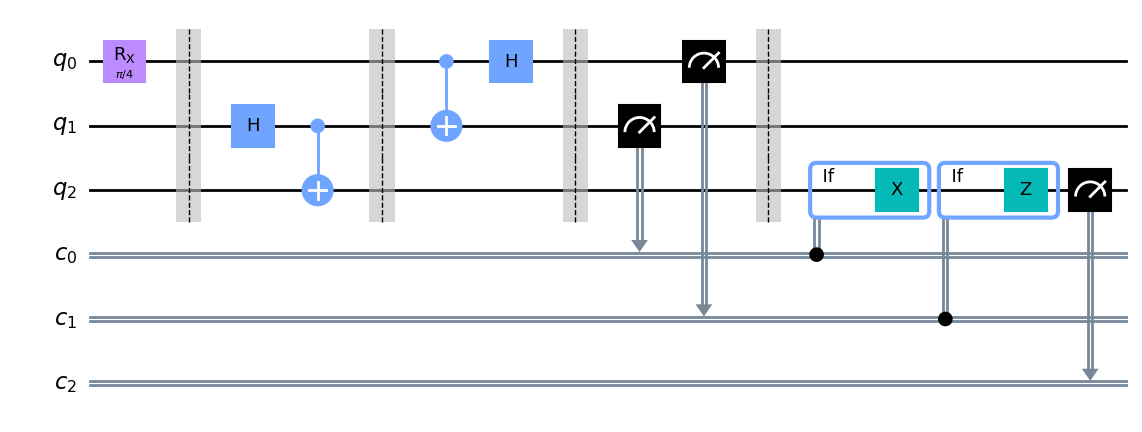

In [14]:
import math

teleport_superposition_circuit: QuantumCircuit

state_prep = QuantumCircuit(qr, cr)
state_prep.rx(math.pi / 4, s)
state_prep.barrier()
teleport_superposition_circuit = state_prep.compose(teleportation_circuit)
teleport_superposition_circuit.draw("mpl", cregbundle=False)

# Uncomment this line to draw your circuit
teleport_superposition_circuit.draw("mpl", cregbundle=False)

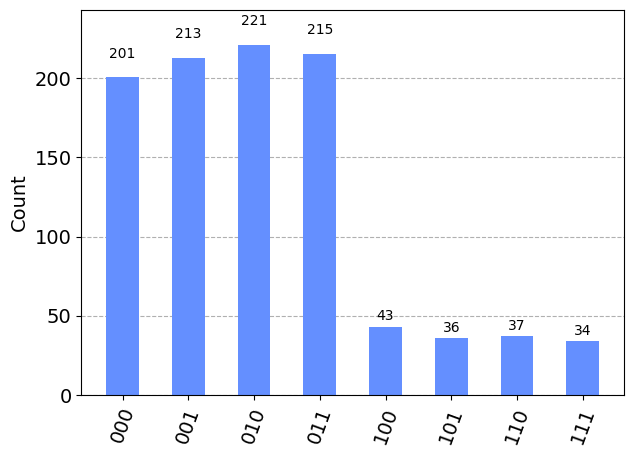

In [15]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

sim = AerSimulator()
transpiled_circuit = transpile(teleport_superposition_circuit, sim)

# run job
shots = 1000
job = sim.run(transpiled_circuit, shots=shots, dynamic=True)

# Get the results and display them
exp_result = job.result()
exp_counts = exp_result.get_counts()
plot_histogram(exp_counts)

  ```{admonition} 解説
  :class: tip
  1行目：新たな回路を作成します。
  2行目：量子ビットSにRXゲートを適用します。".rx"メソッドを使い、1番目の引数には回転角度を、2番目には適用する量子ビットを入力します。
  (3行目：視覚的に左右の回路の違いがわかるようにバリアを挿入します。)
  4行目：".compose"メソッドを使って、先ほど作成したteleport_superposition_circuitと結合させた回路を作成します。
  5行目：作成した回路を描画します。"cregbundle=False"は、古典レジスタのバンドル化（クラウディング）を無効にするオプションで、これにより古典ビットが個別に表示されます。
  ```

他の測定ビットを無視して、ボブの測定値だけの分布を計算してみましょう。

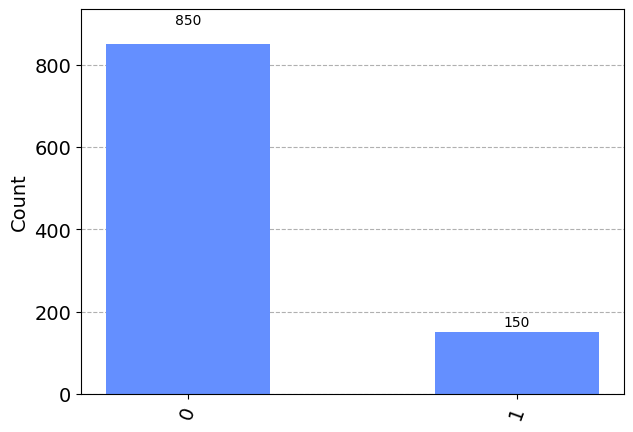

In [16]:
# trace out Bob's results on qubit 2
from qiskit.result import marginal_counts

bobs_counts = marginal_counts(exp_counts, [qr.index(b)])
plot_histogram(bobs_counts)

周辺分布は、理想的な確率にある程度は近いはずです。

In [17]:
# from qc_grader.challenges.spring_2023 import grade_ex2e
# grade_ex2e(bobs_counts)

## 実機を使った確認

```{caution}
以下のコードは実機を扱うためコメントアウトしています
```

~~カーク船長~~ アリスの量子ビットが安全にテレポートすることがほぼ確実になったので、実際のハードウェアで量子テレポーテーション回路を実行してみましょう。

In [18]:
# from qiskit_ibm_provider import IBMProvider

# provider = IBMProvider()

In [19]:
# hub = "YOUR_HUB"
# group = "YOUR_GROUP"
# project = "YOUR_PROJECT"

# backend_name = "ibm_peekskill"
# backend = provider.get_backend(backend_name, instance=f"{hub}/{group}/{project}")

In [20]:
# # backend.target.add_instruction(IfElseOp, name="if_else") # Uncomment if necessary
# qc_transpiled = transpile(teleport_superposition_circuit, backend)

In [21]:
# job = backend.run(qc_transpiled, shots=1000, dynamic=True)

実際のバックエンドで実行するには時間がかかるため、通常はjob_idを使って時間をおいてからジョブを呼び出すことになります。以下のコードは、job_idを通してジョブを呼び出し、実行状況を確認するものです。

In [22]:
# retrieve_job = provider.retrieve_job(job.job_id())
# retrieve_job.status()

無事に終了したら、結果をインポートしましょう。

In [23]:
# # Get the results and display them
# exp_result = retrieve_job.result()
# exp_counts = exp_result.get_counts()
# plot_histogram(exp_counts)

In [24]:
# # trace out Bob's results on qubit 2
# from qiskit.result import marginal_counts

# bobs_qubit = 2
# bobs_counts = marginal_counts(exp_counts, [bobs_qubit])
# plot_histogram(bobs_counts)